# Graph for number of blacklisted liars when lies are fixed and number of liars increasing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
lowerBoundLies = 1000  #lower bound on difference between true latency and lie told about it
upperBoundLies = 50000 #upper bound on difference between true latency and lie told about it
nbNodes = 100
maxNbLiars = 33
lieClusterSizes = [5, 10, 20, 33]
nbLiarCombinations = 100 #nb different combinations of liars chosen throughout test
randomLiars = False      #whether the liars are chosen randomly or within same cluster
withSuspects = True     #activate enhanced blacklisting

random = "random_liars"
if not randomLiars:
    random = "clustered_liars"

filename = "test_" + str(nbNodes) + "_nodes_up_to_" + \
    str(maxNbLiars) + "_liars" +\
    "_var_liars_distance_" + str(upperBoundLies) +\
    "_" + random +\
    "_" + str(nbLiarCombinations) + "_combinations"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/"+filename+".csv")

In [4]:
data

,node,is_liar,is_blacklisted,lie,lieClusterSize
0,N0,False,False,0,5
1,N1,False,False,0,5
2,N2,False,False,0,5
3,N4,False,False,0,5
4,N6,False,False,0,5
5,N7,False,False,0,5
6,N11,False,False,0,5
7,N13,False,False,0,5
8,N15,False,False,0,5
9,N17,False,False,0,5


In [5]:
data["grouped"] = list(zip(data.is_liar, data.is_blacklisted))
grouped_data = data[["node", "grouped", "lieClusterSize"]]

In [6]:
grouped_data

,node,grouped,lieClusterSize
0,N0,"(False, False)",5
1,N1,"(False, False)",5
2,N2,"(False, False)",5
3,N4,"(False, False)",5
4,N6,"(False, False)",5
5,N7,"(False, False)",5
6,N11,"(False, False)",5
7,N13,"(False, False)",5
8,N15,"(False, False)",5
9,N17,"(False, False)",5


In [7]:
grouped_by_node = grouped_data.groupby(["node", "lieClusterSize"]).agg(lambda x: set(x.values.tolist()))

In [8]:
grouped_by_node["nb_situations"] = grouped_by_node['grouped'].map(lambda x: len(x))

In [9]:
grouped_by_node

grouped  \
node lieClusterSize                                                  
N0   5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N1   5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N10  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N11  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N12  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N13  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N14  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N15  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
...                                                            ...   
N92  20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N93  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N94  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N95  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N96  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33                             {(False, False), (True, True)}   
N97  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   
     33              {(True, False), (False, False), (True, True)}   
N98  5                              {(False, False), (True, True)}   
     10                             {(False, False), (True, True)}   
     20                             {(False, False), (True, True)}   

In [10]:
data[["node", "lieClusterSize","is_liar", "is_blacklisted"]]\
.groupby(["is_liar", "is_blacklisted", "lieClusterSize"]).count()

node
is_liar is_blacklisted lieClusterSize        
False   False          5                 6700
                       10                6700
                       20                6700
                       33                6700
True    False          33               41191
        True           5                48500
                       10               94500
                       20              179000
                       33              232709

In [11]:
lies = data[["node","lieClusterSize","is_blacklisted"]][data["lie"] > 0][["lieClusterSize","is_blacklisted"]]

In [12]:
lies

,lieClusterSize,is_blacklisted
13,5,True
14,5,True
15,5,True
16,5,True
17,5,True
18,5,True
19,5,True
20,5,True
21,5,True
22,5,True


In [13]:
lies.groupby("lieClusterSize").agg(lambda x: set(x.values.tolist())).reset_index()

,lieClusterSize,is_blacklisted
0,5,{True}
1,10,{True}
2,20,{True}
3,33,"{False, True}"


In [14]:
bl_by_lie = lies.groupby(['lieClusterSize', 'is_blacklisted']).size().unstack(fill_value=0).reset_index()

In [15]:
bl_by_lie

is_blacklisted,lieClusterSize,False,True
0,5,0,48500
1,10,0,94500
2,20,0,179000
3,33,41191,232709


Text(0.5, 0, 'Number of liars in network')

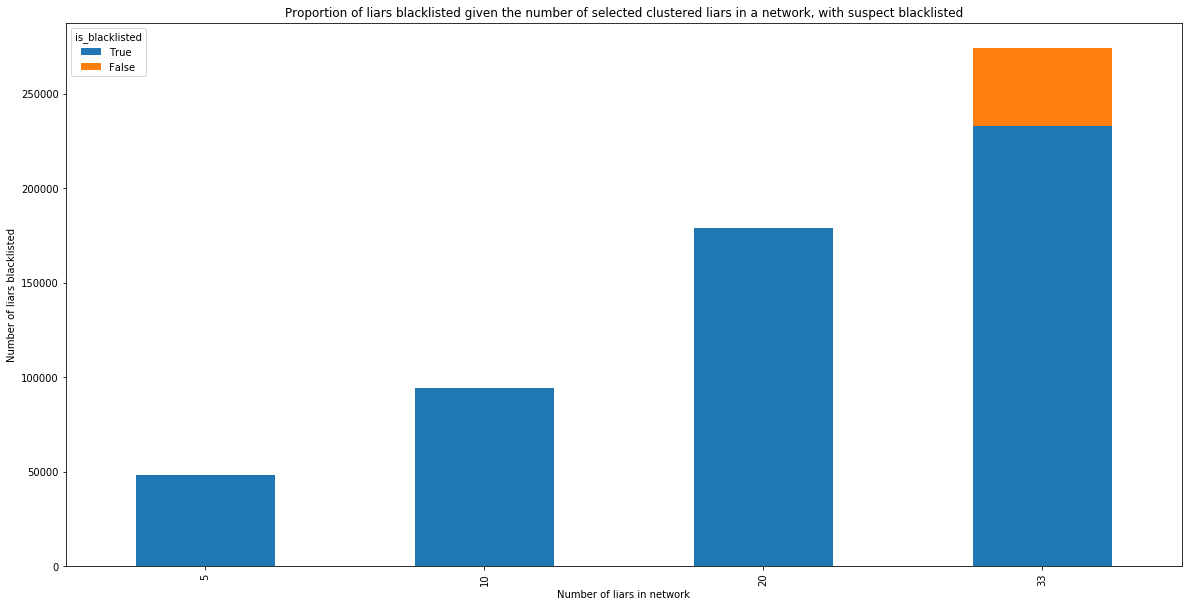

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
bl_by_lie[["lieClusterSize", True, False]]\
.groupby("lieClusterSize").sum().reset_index().plot.bar(
    stacked=True, ax=ax, x="lieClusterSize", 
    title="Proportion of liars blacklisted given the number of selected clustered liars in a network, "+\
    "with suspect blacklisted")

ax.set_ylabel("Number of liars blacklisted")
ax.set_xlabel("Number of liars in network")

In [18]:
fig.savefig('graphs/'+filename+'.png')